In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, random
import cv2
from glob import glob
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, classification_report
from pathlib import Path
from PIL import Image

In [11]:
X = np.load('/content/images.npy')/255.0
y = np.load('/content/labels.npy')

In [20]:
X = np.reshape(X,(-1,128,128,1))

In [21]:
X_train, X_eval, y_train, y_eval = train_test_split(X,y,test_size=0.05,random_state=2024)
print("Training Set Shape = ",X_train.shape)
print("Validation Set Shape = ",X_eval.shape)

Training Set Shape =  (8686, 128, 128, 1)
Validation Set Shape =  (458, 128, 128, 1)


In [22]:
y_train = to_categorical(y_train,10)
y_eval = to_categorical(y_eval, 10)

In [23]:
model = Sequential()

model.add((Conv2D(60,(5,5),input_shape=(128,128,1) ,padding = 'same' ,activation='relu')))
model.add((Conv2D(60, (5,5),padding="same",activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add((Conv2D(30, (3,3),padding="same", activation='relu')))
model.add((Conv2D(30, (3,3), padding="same", activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 60)        │           1,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 60)        │          90,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 60)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 30)          │          16,230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 30)          │           8,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │      15,360,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,481,490 (59.06 MB)

 Trainable params: 15,481,490 (59.06 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
checkpoint = ModelCheckpoint('best_model.h5.keras',
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True,
                             verbose=1)
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=32,callbacks=[checkpoint])

Epoch 1/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.7279 - loss: 0.7686
Epoch 1: val_accuracy improved from -inf to 0.97929, saving model to best_model.h5.keras
245/245 ━━━━━━━━━━━━━━━━━━━━ 57s 148ms/step - accuracy: 0.7286 - loss: 0.7668 - val_accuracy: 0.9793 - val_loss: 0.0645
Epoch 2/10
244/245 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9763 - loss: 0.0802
Epoch 2: val_accuracy improved from 0.97929 to 0.98619, saving model to best_model.h5.keras
245/245 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.9763 - loss: 0.0802 - val_accuracy: 0.9862 - val_loss: 0.0370
Epoch 3/10
244/245 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9892 - loss: 0.0353
Epoch 3: val_accuracy improved from 0.98619 to 0.99194, saving model to best_model.h5.keras
245/245 ━━━━━━━━━━━━━━━━━━━━ 20s 76ms/step - accuracy: 0.9892 - loss: 0.0353 - val_accuracy: 0.9919 - val_loss: 0.0152
Epoch 4/10
244/245 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9910 - loss: 0.0313
Epoch 4: val_accurac

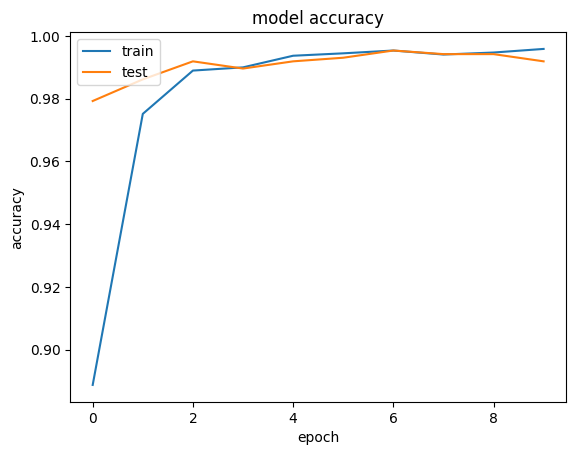

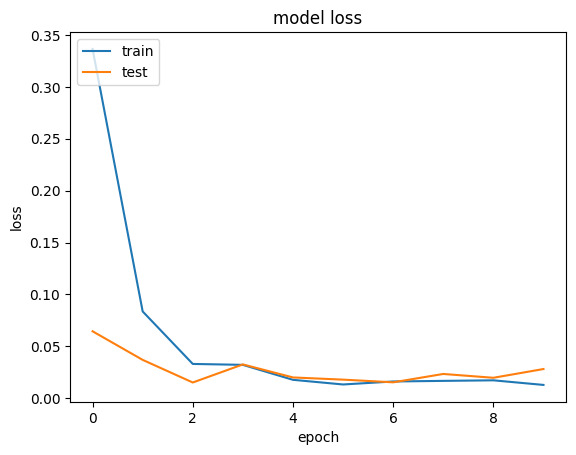

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Accuracy vs Epoch.png')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Loss vs Epoch.png')
plt.show()

In [28]:
from keras.models import load_model
best_model = load_model('best_model.h5.keras')

In [29]:
loss, acc = best_model.evaluate(X_eval, y_eval, batch_size=32)
# loss, acc = model.evaluate(scaler.transform(X_test), y_test, batch_size=batch_sizee)
print(f"\nTest accuracy: {100*acc} %")
print(f"\nTest Loss: {loss}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.9994 - loss: 0.0034

Test accuracy: 99.78166222572327 %

Test Loss: 0.0061949766241014


(1, 128, 128, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[1.]
[2]


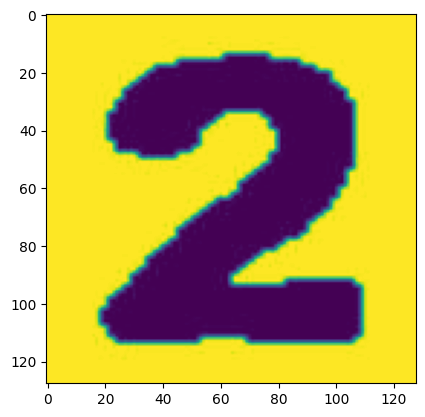

In [53]:
test_image = cv2.imread('/content/Image 24.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(test_image)
test_image = np.reshape(test_image,(1,128,128,1))
test_image = test_image / 255.0
print(test_image.shape)
y_pred = best_model.predict(test_image)
y_hat = np.argmax(y_pred,axis=1)
print(np.max(y_pred,axis=1))
print(y_hat)